Double-click **here** for the Information:
<!-- 
This dataset contains information of users in a social network. Those informations are the user id the gender the age and the estimated salary. A car company has just launched their brand new luxury SUV. And we're trying to see which of these users of the social network are going to buy this brand new SUV And the last column here tells If yes or no the user bought this SUV we are going to build a model that is going to predict if a user is going to buy or not the SUV based on two variables which are going to be the age and the estimated salary. So our matrix of feature is only going to be these two columns. We want to find some correlations between the age and the estimated salary of a user and his decision to purchase yes or no the SUV.
# -->

**Step 1 | Data Pre-Processing**

**Importing the Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

**Importing the dataset**

In [ ]:
url = "https://drive.google.com/file/d/1jRNKjqsjuPmiR0jyzO1--RSRxGGwWLlt/view?usp=sharing"
file_id=url.split('/')[-2]
# print(file_id)
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.shape

(400, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

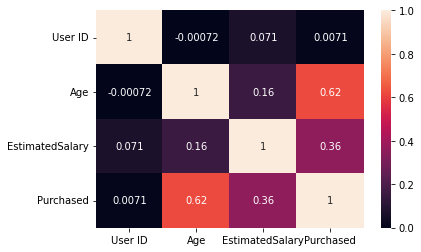

In [ ]:
sns.heatmap(df.corr(), annot = True)

In [ ]:
df.drop("User ID",axis= 1)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [ ]:
df["Gender"] = pd.get_dummies(df["Gender"])

In [ ]:
correlation = df["Age"].corr(df["EstimatedSalary"])
# correlation = df["EstimatedSalary"].corr(df["Age"])

correlation 

0.15523801797209996

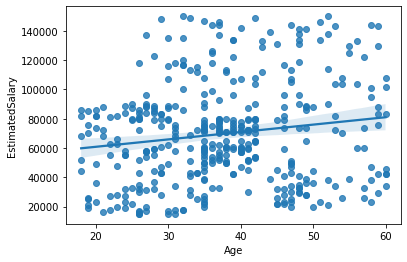

In [ ]:
sns.regplot(x=df["Age"], y=df["EstimatedSalary"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8cc370d9d0>,
      dtype=object)

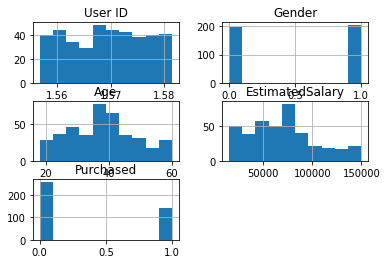

In [ ]:
df.hist()

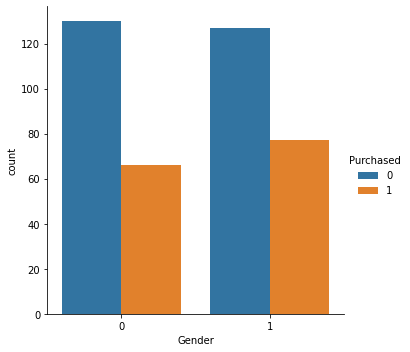

In [ ]:
sns.catplot(x='Gender', hue = 'Purchased', kind='count', data=df)

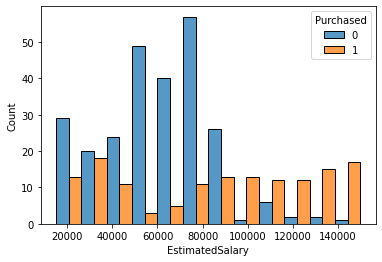

In [ ]:
# df.plot( x='Purchased', y='EstimatedSalary', kind='hist')
sns.histplot(data=df, x="EstimatedSalary", hue="Purchased", multiple="dodge")

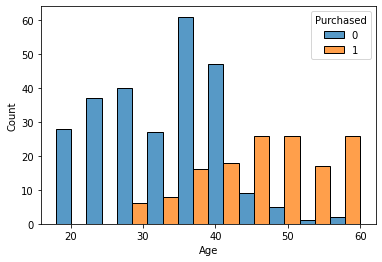

In [ ]:
# df.plot( x='Purchased', y='Age', kind='bar')
sns.histplot(data=df, x="Age", hue="Purchased", multiple="dodge")

**Splitting the dataset into the Training set and Test set**

In [ ]:
X = df.iloc[: , :-1]
X = X.drop("User ID",axis = 1)
Y = df.iloc[: , -1]

In [ ]:
X.shape, Y.shape

((400, 3), (400,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

**Feature Scaling**

In [ ]:
num_cols = ["EstimatedSalary"]
for i in num_cols:
    
    # fit on training data column
    scale = MinMaxScaler().fit(X[[i]])
    
    # transform the training data column
    X_train[i] = scale.fit_transform(X_train[[i]])
    
    # transform the testing data column
    X_test[i] = scale.transform(X_test[[i]])



In [ ]:
X_train

,Gender,Age,EstimatedSalary
96,1,35,0.074074
143,0,30,0.548148
117,0,36,0.274074
238,1,46,0.496296
216,0,49,0.370370
...,...,...,...
155,1,31,0.000000
224,1,35,0.333333
190,0,24,0.511111
397,1,50,0.037037


In [ ]:
X_test

,Gender,Age,EstimatedSalary
101,0,28,0.325926
115,0,40,0.311111
67,1,23,0.496296
97,0,28,0.800000
141,1,18,0.392593
...,...,...,...
351,0,37,0.444444
236,0,40,0.311111
282,0,37,0.407407
222,0,37,0.955556


**Step 2 | Logistic Regression Model**

The library for this job which is going to be the linear model library and it is called linear because the logistic regression is a linear classifier which means that here since we're in two dimensions, our two categories of users are going to be separated by a straight line. Then import the logistic regression class. Next we will create a new object from this class which is going to be our classifier that we are going to fit on our training set.

**Fitting Logistic Regression to the Training set**

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

**Step 3 | Predection**

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

**Step 4 | Evaluating The Predection**

We predicted the test results and now we will evaluate if our logistic regression model learned and understood correctly. So this confusion matrix is going to contain the correct predictions that our model made on the set as well as the incorrect predictions.

**Making the Confusion Matrix**

Text(0.5, 15.0, 'Predicted label')

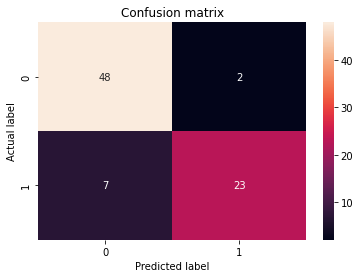

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot=True)
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8875
Precision: 0.92
Recall: 0.7666666666666667


**Visualization**

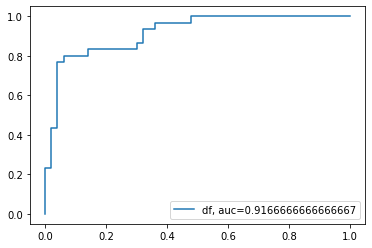

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="df, auc="+str(auc))
plt.legend(loc=4)
plt.show()